In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from get_log_data import read_logs, get_labelized_logdata

X_train, X_validation, Y_train, Y_validation=get_labelized_logdata(4)

Y_train = np.reshape(np.array( Y_train, dtype=np.float32 ),[len(Y_train),1])
Y_train.shape

(14853, 1)

In [11]:
X_train


array([[-0.99768573,  1.2688609 , -0.6293161 , ..., -0.02743011,
        -1.0924715 , -0.4947934 ],
       [-0.99708587,  0.6900069 , -0.22783814, ..., -0.00897573,
        -0.93708444, -0.95996606],
       [-0.99648607,  0.24695882,  0.01763118, ..., -0.00306188,
        -0.7507544 , -1.2232491 ],
       ...,
       [ 2.271976  , -1.080319  , -0.01070972, ..., -0.14546952,
         0.2078023 ,  1.1392142 ],
       [ 2.2723696 , -1.0539738 ,  0.14975137, ..., -0.1190684 ,
         0.14053515,  1.5288258 ],
       [ 2.2727633 , -0.98644596,  0.09481875, ..., -0.0979475 ,
         0.14053515,  1.2749879 ]], dtype=float32)

In [2]:
scoring = 'accuracy'

n_samples,num_features=X_train.shape
num_classes=Y_train.shape[1]
batch_size=n_samples
# Parameters
batch_size,num_features,num_classes


(14853, 7, 1)

In [3]:
import tensorflow as tf
from __future__ import print_function
from tensorflow.python.ops import resources
from tensorflow.contrib.tensor_forest.python import tensor_forest

# Parameters
# num_steps = 500 # Total steps to train

num_trees = 10
max_nodes = 1000

# Input and Target data
X = tf.placeholder(tf.float32, shape=[None, num_features])
Y = tf.placeholder(tf.float32, [None, num_classes]) 

rng = np.random
# Set model weights
W = tf.Variable(rng.randn(num_features, num_classes).astype(np.float32), name="weight")
b = tf.Variable(rng.randn(num_classes).astype(np.float32), name="bias")

In [10]:
X

<tf.Tensor 'Placeholder:0' shape=(?, 7) dtype=float32>

In [4]:
learning_rate = 0.1


# Construct a linear model
pred1 = tf.add(tf.matmul(X, W), b)
# pred = tf.add(tf.multiply(X, W), b)
optcost = tf.reduce_sum(tf.pow(pred1-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(optcost)
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [5]:
display_step = 1000
# bdisplay_step = 100
minbatch_size=1000
n_iterations = 10000
# Start training
with tf.Session() as sess:
    sess.run(init)
    

    # minibatch training
    for i in range(n_iterations):
        rand_index = np.random.choice(n_samples,minbatch_size)
        rand_x = X_train[rand_index]
        rand_y = Y_train[rand_index]
        sess.run(optimizer, feed_dict={X: rand_x, Y:rand_y})
        if (i+1) % display_step == 0:
            c = sess.run(optcost, feed_dict={X: rand_x, Y:rand_y})
            print( "Run:", '%04d' % (i+1), "cost=", "{:.9f}".format(c))

    print ("Optimization Finished!")
    training_cost = sess.run(optcost, feed_dict={X: X_train, Y:Y_train})
    print ("Training cost=", c, training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    fW=sess.run(W)
    fb=sess.run(b)
    Y_pred= sess.run(tf.matmul(X_train.astype(np.float32),W))
Y_pred



Run: 1000 cost= 0.037520334
Run: 2000 cost= 0.036675114
Run: 3000 cost= 0.037565276
Run: 4000 cost= 0.035617426
Run: 5000 cost= 0.034290172
Run: 6000 cost= 0.035068471
Run: 7000 cost= 0.034500893
Run: 8000 cost= 0.034683943
Run: 9000 cost= 0.034674462
Run: 10000 cost= 0.035203282
Optimization Finished!
Training cost= 0.03520328 0.519183 W= [[ 0.00646424]
 [ 0.12952325]
 [ 0.05567344]
 [-0.0177451 ]
 [ 0.17223783]
 [-0.16247112]
 [-0.18299757]] b= [1.5911332] 



array([[ 0.39303264],
       [ 0.40430373],
       [ 0.3800514 ],
       ...,
       [-0.39135164],
       [-0.43539798],
       [-0.3796178 ]], dtype=float32)

In [6]:
Y_pred

array([[ 0.39303264],
       [ 0.40430373],
       [ 0.3800514 ],
       ...,
       [-0.39135164],
       [-0.43539798],
       [-0.3796178 ]], dtype=float32)

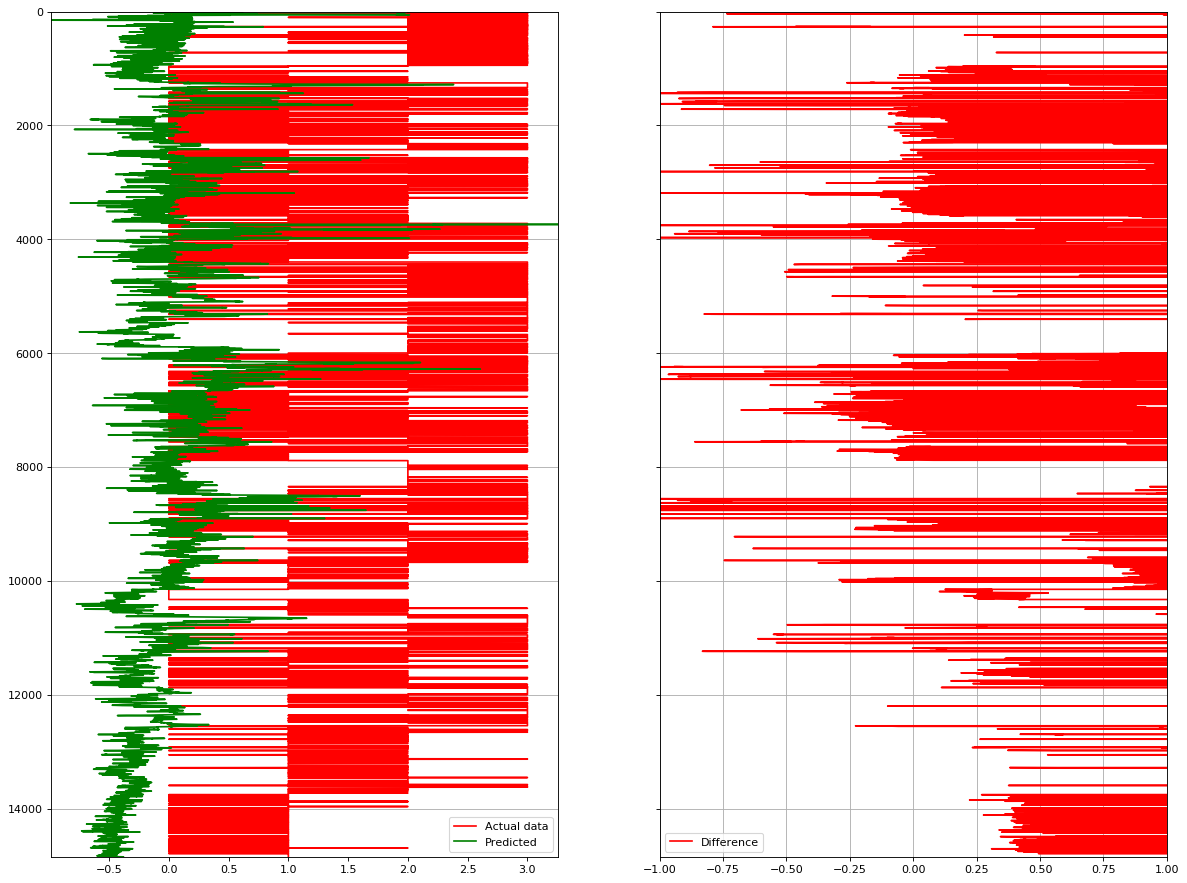

In [9]:
id=1
# Y_train=Y_train_inv[:,id]
# Y_pred=Y_pred_inv[:,id]

%matplotlib inline
from matplotlib import pyplot as plt
# Y_train,Y_pred
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 14), dpi= 80, sharey=True)
i=0
perc_diff=(-Y_pred+Y_train)
for axes in ax:
    if(i==0):
        axes.plot( Y_train,range(len(Y_train)), label="Actual data",color='red')
        axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
        axes.set_xlim (min(Y_pred),max(Y_pred))
    else:
        axes.plot(perc_diff  ,range(len(Y_train)), label="Difference",color='red')
        axes.set_xlim (-1,+1)
        axes.xaxis.grid(True)
#         axes.plot( Y_pred,range(len(Y_pred)), label="Predicted",color='green')
    i+=1
    axes.set_ylim (0,len(Y_train))
    axes.legend()
    axes.invert_yaxis()
    axes.yaxis.grid(True)
#     axes.get_xaxis().set_visible(False) 
#     axes.set_title('',verticalalignment='top')
#     axes.spines['top'].set_position(('outward',0))
#     axes.set_xlabel("hi")
#     axes.twiny()
    
    
plt.show()

In [ ]:
# Y_train,Y_pred
xid=0
yid=0
#     #Graphic display
# plt.plot(Xo_train[:,xid], Y_train[:,yid], 'r.', label='Original data')
# plt.plot(Xo_train[:,xid], Y_pred[:,yid],'b.', label='Fitted line')
plt.plot(Y_train_inv[:,yid], Y_pred_inv[:,yid],'b*', label='Fitted line')
plt.legend()
plt.show()